Презентация на Я.Диске:https://yadi.sk/d/cA9bnj-G2nXFuw


#Ритейл — Оценка эффективности торговых точек

1. [Описание проекта](#1)

   - Задача проекта 
   - Кто проверяет результат
   - Как будут использоваться полученные данные
   - Описание данных



2. [Предобработка](#2)    

    - Удаление дубликатов
    - Приведение колонок к нижнему регистру
    - Исследовать и заменить пропущенные значения
    - Исследовать и привести типы данных



3. [Исследовательский анализ](#3)

    - Исследовать датафрейм с ценами, заменить цены на медианное значение
    - Исследовать аномальное количество покупок и аномальные стоимости
    - Объединить датафреймы
    - Проверить временной период данных
    - Диаграмма количества покупок
    - Диаграмма количества покупателей
  

4. [Анализ бизнес-показателей](#4)
  
    - Посчитать средний чек, среднее количество товаров в чеке, количество покупателей в каждой точке
    - Посчитать выручку по торговым точкам
    - Найти наиболее продаваемые товары
    - Определить категории товаров, приносящих большую прибыль
    - Визуализировать метрики

5. [Статистический анализ](#5)

    - Выдвинуть гипотезы на основе исследовательского анализа


6. [Выводы](#6)

#Описание проекта <p id = "1"> </p>

#Задача

- Задача: оценить влияние программы лояльности на общую выручку по всем торговым точкам
- Данные по проекту предоставляютя ответственным менеджерам за проведение программы лояльности покупателей и за оценку эффективности торговых точек

### Описание данных:

Датасет содержит данные о покупках в магазине строительных материалов «Строили, строили и наконец построили». Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

Файл retail_dataset.csv:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

Файл product_codes.csv:

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;

Данные на Я.Диске: https://yadi.sk/d/cA9bnj-G2nXFuw

#Предобработка данных <p id = "2"> </p>

In [1]:
#импорт библиотек
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import seaborn as sns
from scipy import stats as st


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
#импорт файлов
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
  #print('User uploaded file "{name}" with length {length} bytes'. format(name = fn, length = len(uploaded[fn])))


In [3]:
#чтение файла retail_dataset
df = pd.read_csv("retail_dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [4]:
#перевод в нижний регистр
df.columns = df.columns.str.lower()

In [5]:
#чтение файла product_codes
code = pd.read_csv("product_codes.csv")
code.info()
code.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


In [6]:
#переименовали столбец
code = code.rename(columns = {'productID' : 'item_id'})

In [7]:
#группировка по наименованиям
#подсчет медианы, минимального, максимального
code.groupby('item_id')['price_per_one'].\
agg(['median','min', 'max', 'std']).\
reset_index().\
query('std >0')

,item_id,median,min,max,std
0,10002,1.630,0.85,1.66,0.459239
6,10125,0.810,0.42,1.66,0.455664
7,10133,0.830,0.42,1.66,0.503455
8,10135,1.265,0.42,2.51,0.826140
9,11001,3.290,1.69,3.36,0.944616
...,...,...,...,...,...
3151,M,12.750,0.19,1715.85,442.133727
3152,POST,12.990,0.00,40.00,13.489963
3153,S,12.950,2.80,128.56,34.229488
3154,gift_0001_20,16.845,16.67,17.02,0.247487


В файле товары-цены товары имеют разную стоимость

Из 9969 строк 2494 с разными ценами на товар, заменим стоимость на медианное значение, так как медиана наименее чувствительна к выбросам

In [8]:
code['price_per_one'] = code.groupby(['item_id']).price_per_one.apply(lambda x: x.fillna(x.median()))

In [9]:
code_grouped = code.\
groupby('item_id')['price_per_one'].agg(['median']).\
reset_index()

In [10]:
code_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  3159 non-null   object 
 1   median   3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


2 файла содержат пропущенные значения, явные выбросы. Далее объединим данные из 2-х таблиц, рассмотрим подробнее.

#Исследовательский анализ данных <p id ="3"></p>

In [11]:
#объединим 2 датафрейма
df_new = pd.merge(df, code_grouped, on = ('item_id'))

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105335 entries, 0 to 105334
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_id          105335 non-null  object 
 2   quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   customerid       69125 non-null   float64
 5   shopid           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
 7   median           105335 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.2+ MB


In [13]:
df_new= (df_new.rename(
    columns = {'purchaseid' : 'purchase_id',                                    #переименовываем названия колонок
               'purchasedate' : 'purchase_date', 
               'customerid' : 'customer_id', 
               'shopid' : 'shop_id', 
               'median' : 'price_per_id' })
.drop_duplicates()                                                              #удаляем дубликаты
.assign(purchase_date = lambda x: pd.to_datetime(x['purchase_date']))           #приводим тип данных
.assign(loyalty_program = lambda x: x['loyalty_program'].astype('int'))         #приводим дату к типу datetime
.assign(customer_id = lambda x: x['customer_id'].fillna(value = '')))           #заполняем пропущенные значения

In [14]:
#новые столбцы с номером недели и месяца
df_new['purchase_week'] = df_new['purchase_date'].dt.week
df_new['purchase_month'] = df_new['purchase_date'].dt.month

In [15]:
df_new

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_id,purchase_week,purchase_month
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,1.63,49,12
1,541104,21873,0,2017-01-13 14:29:00,,Shop 0,0,1.63,2,1
2,540418,21873,1,2017-01-07 11:04:00,,Shop 0,0,1.63,1,1
3,541516,21873,2,2017-01-18 17:34:00,,Shop 0,0,1.63,3,1
4,541566,21873,35,2017-01-19 11:50:00,23401,Shop 0,1,1.63,3,1
...,...,...,...,...,...,...,...,...,...,...
105330,538852,90058B,35,2016-12-14 13:33:00,23051,Shop 0,1,0.38,50,12
105331,539988,46138B,1,2016-12-23 16:06:00,23795,Shop 0,1,1.95,51,12
105332,537025,90053,0,2016-12-03 16:21:00,,Shop 0,0,2.55,48,12
105333,542731,17028J,5,2017-01-31 15:27:00,19279,Shop 0,0,0.42,5,1


Объединили датафрейм, с которым будет работать

In [16]:
print('Первая дата отчета', df_new['purchase_date'].min())

Первая дата отчета 2016-12-01 08:26:00


In [17]:
print('Последняя дата отчета',df_new['purchase_date'].max())

Последняя дата отчета 2017-02-28 17:04:00


In [18]:
df_new['purchase_week'].unique()

array([49,  2,  1,  3, 50,  6,  8,  9,  5, 51,  7, 48,  4])

Мы располагаем данными за период с 1 декабря 2016 года по 28 февраля 2017 года, причем данные за новогодние праздники отсутствуют.

Добавим новый столбец сумма, рассчитанный умножением стоимости товара и количества товара в чеке

In [19]:
df_new['sum'] = df_new['quantity'] * df_new['price_per_id']

Исследуем столбец quantity

In [20]:
#срез количество покупок меньше 0
df_new[df_new['quantity'] < 0]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_id,purchase_week,purchase_month,sum
49,C542537,22195,-2,2017-01-28 13:54:00,18180,Shop 4,0,3.29,4,1,-6.58
349,C540250,79321,-2,2017-01-05 16:02:00,23190,Shop 0,1,5.75,1,1,-11.50
446,C540417,79321,-73,2017-01-07 10:56:00,19359,Shop 0,0,5.75,1,1,-419.75
678,C542078,22189,-2,2017-01-25 12:11:00,18533,Shop 0,0,3.95,4,1,-7.90
735,C542792,22891,-2,2017-02-01 10:49:00,20306,Shop 0,0,6.27,5,2,-12.54
...,...,...,...,...,...,...,...,...,...,...,...
105309,545219,20738,-37,2017-02-28 17:04:00,,Shop 0,0,0.00,9,2,-0.00
105316,C544653,85065,-2,2017-02-22 12:55:00,18792,Shop 0,0,12.75,8,2,-25.50
105318,542556,22143,-2,2017-01-28 14:50:00,,Shop 0,0,0.00,4,1,-0.00
105329,540560,21589,-15,2017-01-10 10:08:00,,Shop 0,0,0.00,2,1,-0.00


In [21]:
df_new.loc[(df_new['item_id'] == "79321") & (df_new['customer_id'] == 19359)]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_id,purchase_week,purchase_month,sum
443,540275,79321,71,2017-01-06 12:11:00,19359,Shop 0,0,5.75,1,1,408.25
446,C540417,79321,-73,2017-01-07 10:56:00,19359,Shop 0,0,5.75,1,1,-419.75


In [22]:
df_new.loc[(df_new['item_id'] == "79320") & (df_new['customer_id'] == 18760)]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_id,purchase_week,purchase_month,sum
105334,C540246,79320,-2,2017-01-05 15:43:00,18760,Shop 0,0,4.95,1,1,-9.9


Есть отрицательные значения количества покупок. Это позиции, которые вернули. Мы видим, что в датасете есть данные о покупке этих позиций и об их возврате, но есть и строки, где только возврат, без информации об их покупке, значит эта информация в данный датасет не попала по причине того, что покупка была совершена раньше

Оставляем данные, так как при суммарных подсчетах они будут учитываться со знаком минус и корректно отобразят движение денежных средств

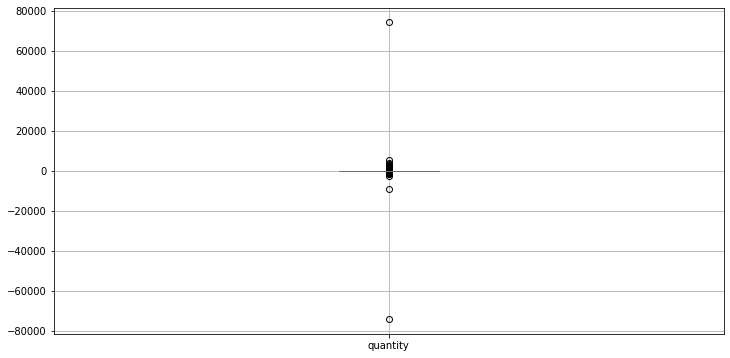

In [23]:
df_new[['quantity']].boxplot(figsize = (12,6))

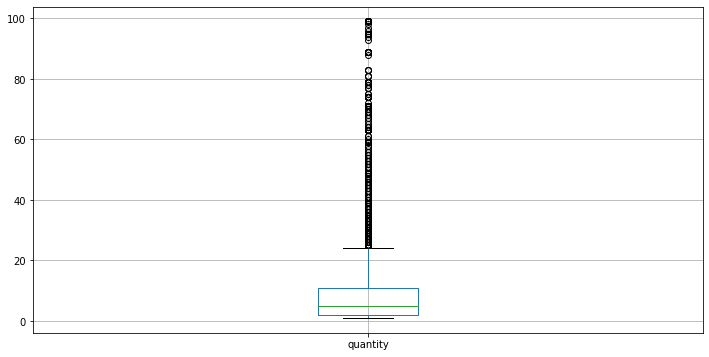

In [24]:
df_new.query('quantity < 100 & quantity >0')[['quantity']].boxplot(figsize = (12,6))

Очень большой хвост, нужно рассматривать точки с большим количеством покупок

In [25]:
df_new.query('quantity >70000')['shop_id'].unique()

array(['Shop 0'], dtype=object)

Точка с большим количеством покупок (более 70 000) Shop 0

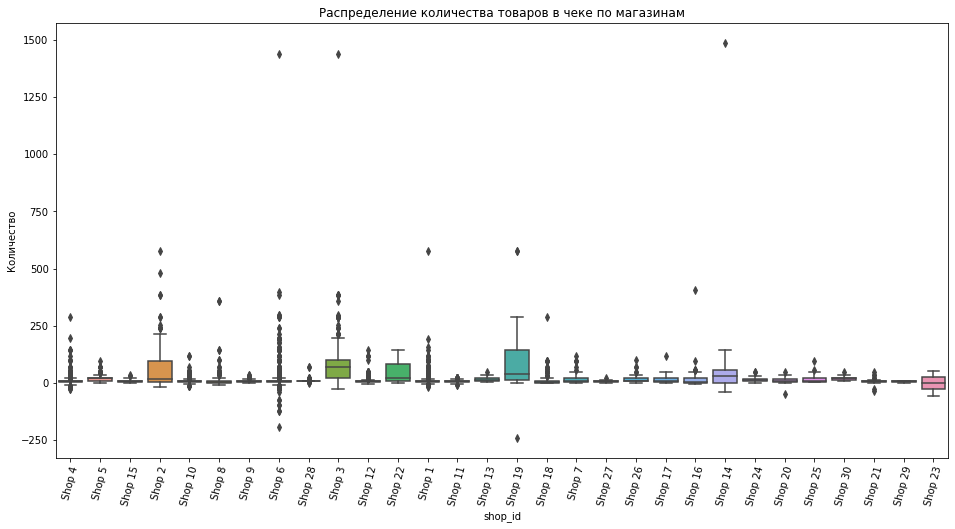

In [26]:
plt.figure(figsize=(16,8))
sns.boxplot(x = 'shop_id', y = 'quantity' , data=df_new[~df_new['shop_id'].isin(['Shop 0'])])
plt.title('Распределение количества товаров в чеке по магазинам')
plt.xticks(rotation=75)
plt.ylabel('Количество');

Большой разброс данных по магазинам, вероятно, из-за недостаточного накопления данных. Отфильтруем выбросы и просчитаем процент отфильтрованных данных.

In [27]:
#новая таблица. срез -250 < quantity < 500
df_new_filtered = df_new[(df_new['quantity'] <500) & (df_new['quantity'] > -250)]

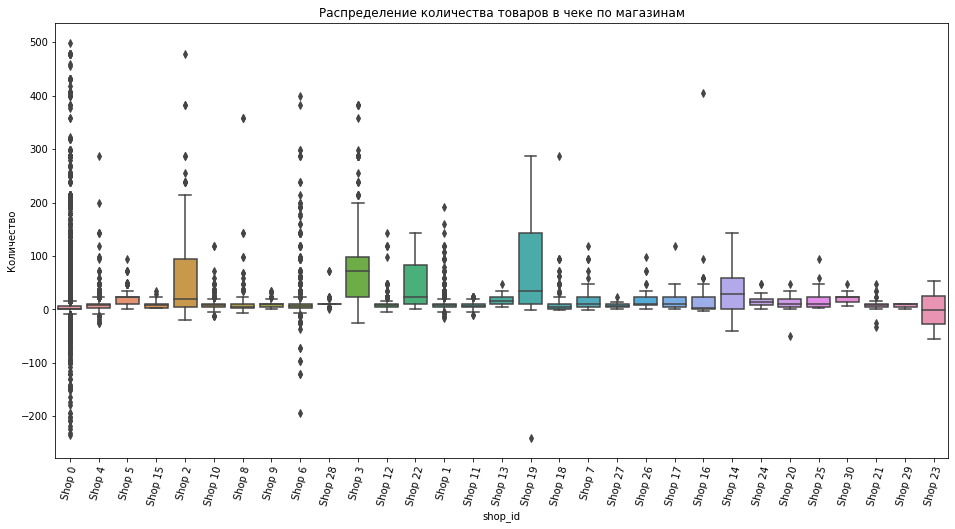

In [28]:
plt.figure(figsize=(16,8))
sns.boxplot(x = 'shop_id', y = 'quantity' , data=df_new_filtered)
plt.title('Распределение количества товаров в чеке по магазинам')
plt.xticks(rotation=75)
plt.ylabel('Количество');

Отфильтровали данные, магазин Shop 0 выделяется на фоне всех остальных

In [29]:
df_new_filtered.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_id,purchase_week,purchase_month,sum
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,1.63,49,12,17.93
1,541104,21873,0,2017-01-13 14:29:00,,Shop 0,0,1.63,2,1,0.00
2,540418,21873,1,2017-01-07 11:04:00,,Shop 0,0,1.63,1,1,1.63
3,541516,21873,2,2017-01-18 17:34:00,,Shop 0,0,1.63,3,1,3.26
4,541566,21873,35,2017-01-19 11:50:00,23401,Shop 0,1,1.63,3,1,57.05


Исследуем стоимости покупок

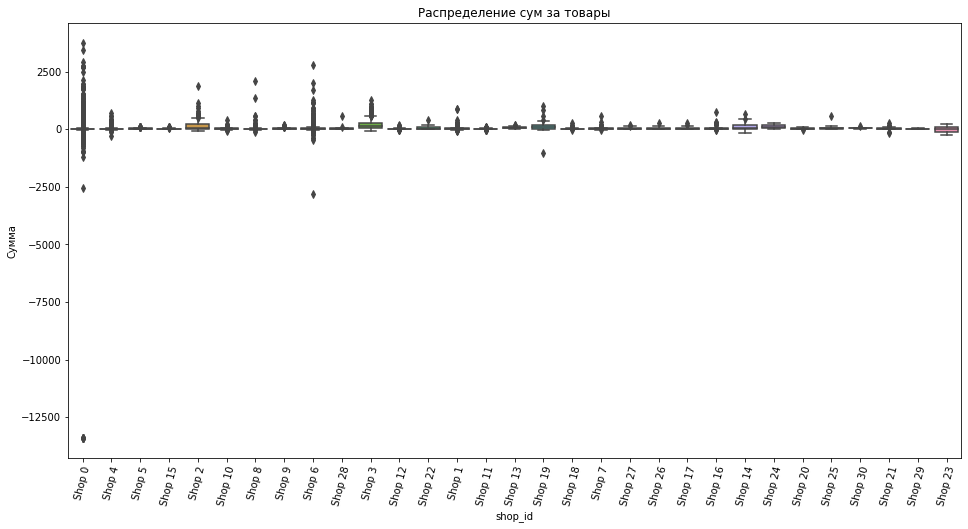

In [30]:
plt.figure(figsize=(16,8))
sns.boxplot(x = 'shop_id', y = 'sum' , data=df_new_filtered)
plt.title('Распределение сум за товары')
plt.xticks(rotation=75)
plt.ylabel('Сумма');

Shop 0 не дает посмотреть полностью картину, посмотрим распределение без него

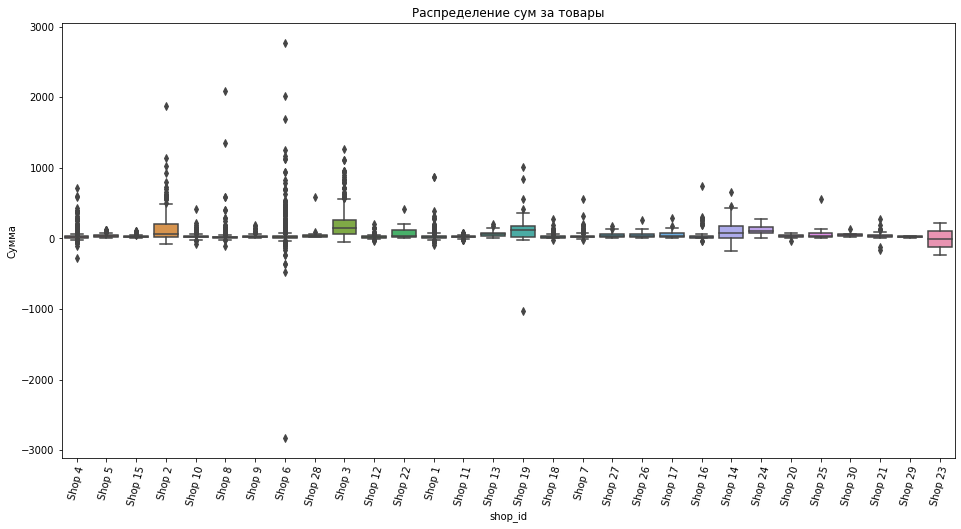

In [31]:
plt.figure(figsize=(16,8))
sns.boxplot(x = 'shop_id', y = 'sum' , data=df_new_filtered[~df_new_filtered['shop_id'].isin(['Shop 0'])])
plt.title('Распределение сум за товары')
plt.xticks(rotation=75)
plt.ylabel('Сумма');

Разбросы по суммам тоже большие, как и количество покупок. Отфильтруем данные

In [32]:
df_new_filtered = df_new_filtered.loc[(df_new_filtered['sum'] < 1500) & (df_new_filtered['sum'] > -1000)]

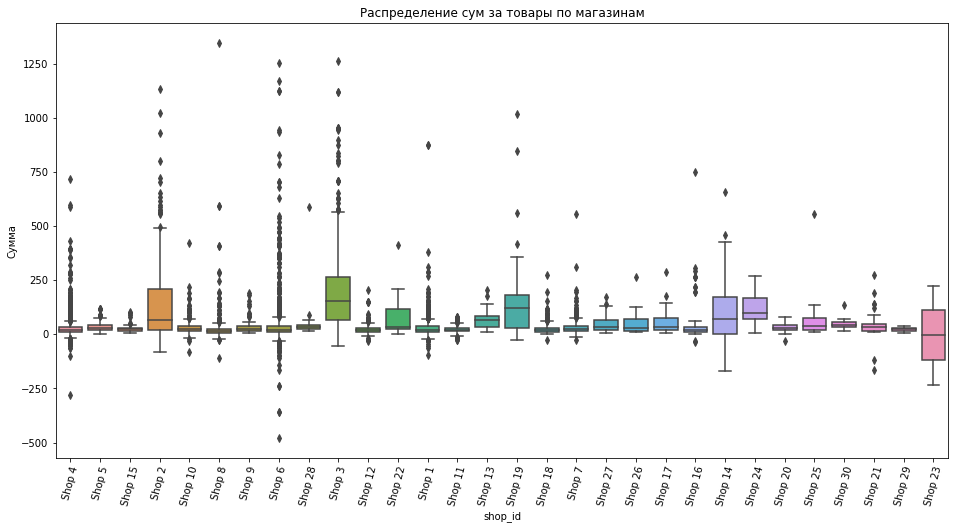

In [33]:
plt.figure(figsize=(16,8))
sns.boxplot(x = 'shop_id', y = 'sum' , data=df_new_filtered[~df_new_filtered['shop_id'].isin(['Shop 0'])])
plt.title('Распределение сум за товары по магазинам')
plt.xticks(rotation=75)
plt.ylabel('Сумма');

In [34]:
print('Процент отфильтрованных данных', 100 - (len(df_new_filtered) *100  / len(df_new)))

Процент отфильтрованных данных 0.13134935092328703


Мы отфильтровали данные, убрали 0,13% данных, что немного и не окажет влияние на исследование. Причиной выбросов могут быть неполные данные, нужны данные за больший временной период.

In [35]:
df_new_filtered.describe()

,quantity,loyalty_program,price_per_id,purchase_week,purchase_month,sum
count,104165.000000,104165.000000,104165.000000,104165.000000,104165.000000,104165.000000
mean,7.169145,0.224308,4.657155,22.573936,5.688245,19.299379
std,20.910237,0.417128,23.057179,22.055223,5.192219,58.126195
min,-235.000000,0.000000,0.000000,1.000000,1.000000,-967.505000
25%,0.000000,0.000000,1.650000,4.000000,1.000000,0.000000
50%,2.000000,0.000000,2.975000,7.000000,2.000000,5.850000
75%,7.000000,0.000000,5.205000,49.000000,12.000000,18.775000
max,479.000000,1.000000,6706.710000,51.000000,12.000000,1462.160000


В программе лояльность участвуют 22%, количество покупок остаются со знаком минус, сильный разброс, цена за единицу товара - сильный разбром, несмотря на замену на медианное значение. Есть разные категории товаров в разном ценовом диапазоне. 

Количество покупателей по неделям

Text(0.5, 0, 'Неделя/Месяц')

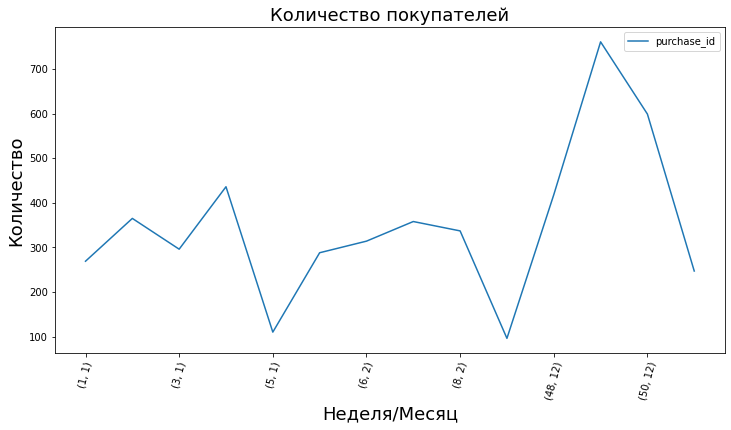

In [36]:
df_new.\
groupby(['purchase_week', 'purchase_month'])[['purchase_id']].\
agg('nunique').plot(figsize = (12,6))
plt.xticks(rotation = 75)
plt.title('Количество покупателей',fontsize=18)
plt.ylabel('Количество',fontsize=18)
plt.xlabel('Неделя/Месяц',fontsize=18 )

Количество покупателей повышается в 48 и 50 недели, данные в новогодние праздники отсутствуют, в первую неделю года количество покупателей снижается.

#Анализ бизнес-показателей <p id = "4"> </p>

Сгруппируем данные по торговым точкам и рассчитаем средний чек, среднее количество товаров в чеке

In [37]:
df_grouped = (df_new_filtered     
.groupby('shop_id')                                                            #группировка по магазинам
.agg(
    {'sum' : 'sum',                                                             #общая выручка
     'quantity' : 'sum',                                                        #общее количество проданного товара
     'purchase_id' : 'nunique',                                                 #количество уникальных чеков (покупателей)
     'item_id' : 'nunique',                                                     #количество уникальных товаров
     'loyalty_program' : 'mean',                                                #среднее значение программы лояльность (процент покупателей с картой)
     'price_per_id' : 'median'}                                                 #медианное значение цены всех товаров
     )
.assign(avg_check = lambda x: x['sum'] / x['purchase_id'])                      #новый столбец средний чек
.assign(avg_quantity = lambda x: x['quantity'] / x['purchase_id'])              #новый столбец среднее количество товара в чеке
.reset_index())             
df_grouped

,shop_id,sum,quantity,purchase_id,item_id,loyalty_program,price_per_id,avg_check,avg_quantity
0,Shop 0,1606026.070,594111,4411,3144,0.241327,2.9500,364.095686,134.688506
1,Shop 1,46119.030,17319,90,588,0.000000,2.9500,512.433667,192.433333
2,Shop 10,9949.380,3282,15,202,0.000000,3.7550,663.292000,218.800000
3,Shop 11,4023.410,1330,10,153,0.000000,3.2900,402.341000,133.000000
4,Shop 12,6813.930,3357,21,186,0.000000,2.7200,324.472857,159.857143
5,Shop 13,2410.330,617,4,29,0.000000,4.3700,602.582500,154.250000
6,Shop 14,15893.055,5406,5,114,0.000000,2.4700,3178.611000,1081.200000
7,Shop 15,1736.520,574,2,49,0.000000,3.9500,868.260000,287.000000
8,Shop 16,3828.300,1211,4,57,0.000000,6.2700,957.075000,302.750000
9,Shop 17,2236.450,638,2,38,0.000000,4.2100,1118.225000,319.000000


In [38]:
df_grouped.describe()

,sum,quantity,purchase_id,item_id,loyalty_program,price_per_id,avg_check,avg_quantity
count,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,6.484903e+04,24089.483871,155.870968,252.516129,0.064124,3.545403,1344.677005,468.678647
std,2.868659e+05,106138.731823,790.128755,568.914221,0.211753,1.737548,1398.622348,532.535224
min,-8.500000e+00,-2.000000,1.000000,1.000000,0.000000,1.630000,-4.250000,-1.000000
25%,2.165960e+03,534.000000,2.000000,32.500000,0.000000,2.735000,481.091833,158.599624
50%,3.984625e+03,1330.000000,4.000000,57.000000,0.000000,3.115000,750.867500,319.000000
75%,1.306048e+04,5028.500000,15.000000,215.500000,0.000000,3.752500,1681.914167,512.000000
max,1.606026e+06,594111.000000,4411.000000,3144.000000,1.000000,11.040000,6677.647667,2777.133333


Shop 0 показывает самую большую выручку, самый большой ассортимент, похоже на склад, покажем график без него

Text(0.5, 0, 'Номер точки')

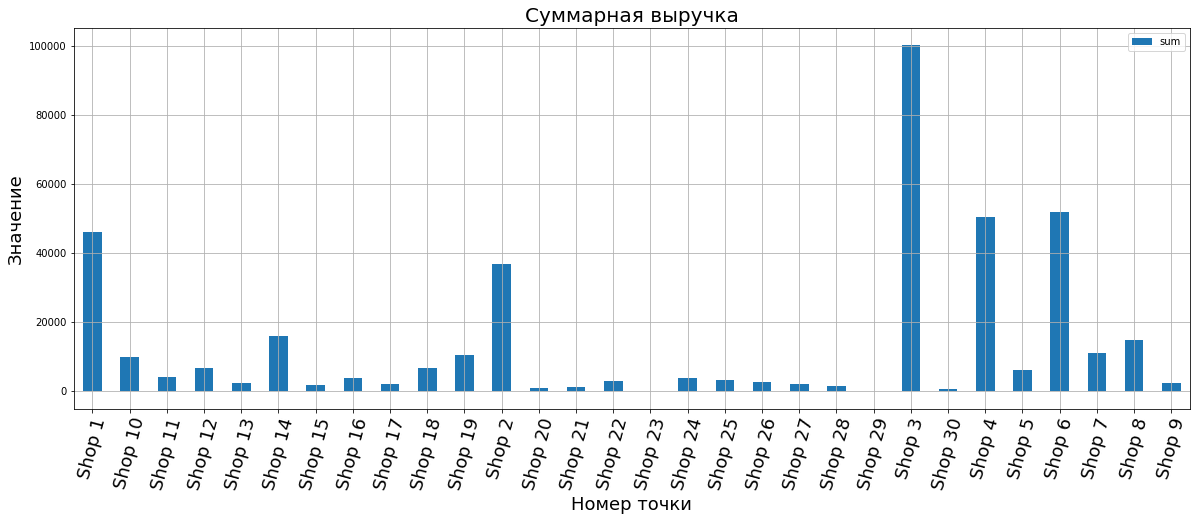

In [39]:

df_grouped[~df_grouped['shop_id'].isin(['Shop 0'])].\
plot(x = 'shop_id', y = ['sum'], figsize =(20,7), kind= 'bar', grid=True)
plt.title('Суммарная выручка',fontsize=20)
plt.xticks(fontsize=18, rotation = 75)
plt.ylabel('Значение',fontsize=18)
plt.xlabel('Номер точки',fontsize=18 )

Следующие магазины с самой высокой выручкой

In [40]:
df_grouped[~df_grouped['shop_id'].isin(['Shop 0'])].\
sort_values(by = 'sum' , ascending = False).\
head()

,shop_id,sum,quantity,purchase_id,item_id,loyalty_program,price_per_id,avg_check,avg_quantity
23,Shop 3,100164.715,41657,15,296,0.0,2.470,6677.647667,2777.133333
27,Shop 6,51947.615,16592,46,644,0.0,3.325,1129.295978,360.695652
25,Shop 4,50533.035,17937,114,703,0.0,3.115,443.272237,157.342105
1,Shop 1,46119.030,17319,90,588,0.0,2.950,512.433667,192.433333
12,Shop 2,36820.295,13681,19,201,0.0,3.290,1937.910263,720.052632


Посмотрим за счет чего они получают высокую выручку, построим графики среднего чека и среднего количества товаров в чеке

Text(0.5, 0, 'Номер точки')

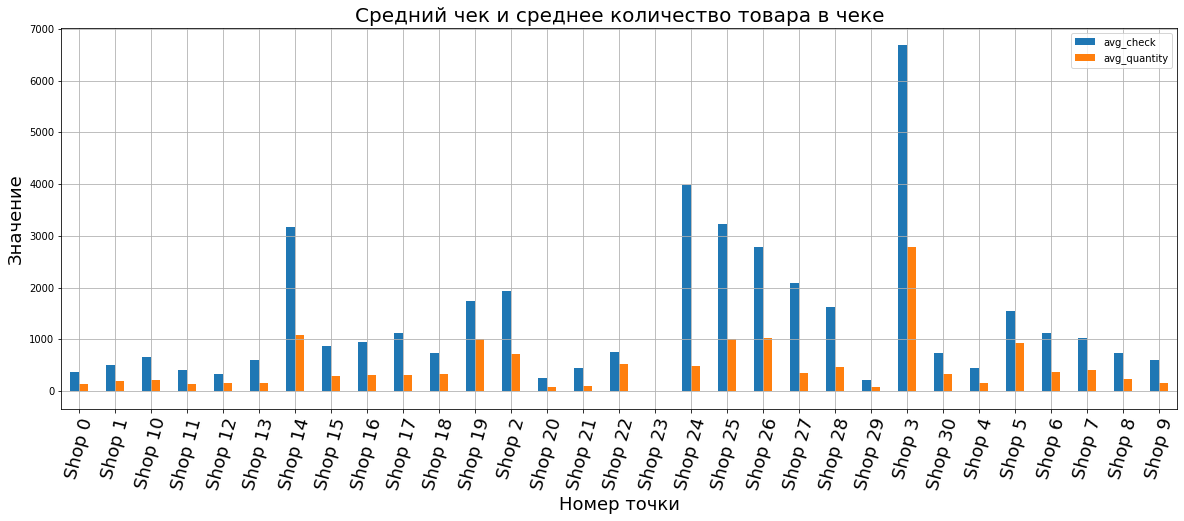

In [41]:
df_grouped.\
plot(x = 'shop_id', y = ['avg_check', 'avg_quantity'], figsize =(20,7), kind= 'bar', grid=True)
plt.title('Средний чек и среднее количество товара в чеке',fontsize=20)
plt.xticks(fontsize=18, rotation = 75)
plt.ylabel('Значение',fontsize=18)
plt.xlabel('Номер точки',fontsize=18 )

In [42]:
df_grouped.\
sort_values(by = 'avg_check', ascending = False).\
head()


,shop_id,sum,quantity,purchase_id,item_id,loyalty_program,price_per_id,avg_check,avg_quantity
23,Shop 3,100164.715,41657,15,296,0.0,2.470,6677.647667,2777.133333
17,Shop 24,3984.625,494,1,32,0.0,11.040,3984.625000,494.000000
18,Shop 25,3234.265,1008,1,47,0.0,3.115,3234.265000,1008.000000
6,Shop 14,15893.055,5406,5,114,0.0,2.470,3178.611000,1081.200000
19,Shop 26,2775.590,1035,1,56,0.0,2.750,2775.590000,1035.000000


In [43]:
df_grouped.\
sort_values(by = 'avg_quantity', ascending = False).\
head()

,shop_id,sum,quantity,purchase_id,item_id,loyalty_program,price_per_id,avg_check,avg_quantity
23,Shop 3,100164.715,41657,15,296,0.000000,2.470,6677.647667,2777.133333
6,Shop 14,15893.055,5406,5,114,0.000000,2.470,3178.611000,1081.200000
19,Shop 26,2775.590,1035,1,56,0.000000,2.750,2775.590000,1035.000000
11,Shop 19,10451.600,6077,6,60,0.633803,1.950,1741.933333,1012.833333
18,Shop 25,3234.265,1008,1,47,0.000000,3.115,3234.265000,1008.000000


Shop 19 - большое количество товаров в чеке, но средняя цена товара низкая. Рекомендация:расширить ассортимент более дорогими позициями.

Только shop 3 имеет высокую выручку за счет среднего высокого чека и большого количества товаров в чеке. Остальные точки имеют высокий средний чек, но не показывают высокую выручку. Посмотрим количество покупателей

Text(0.5, 0, 'Номер точки')

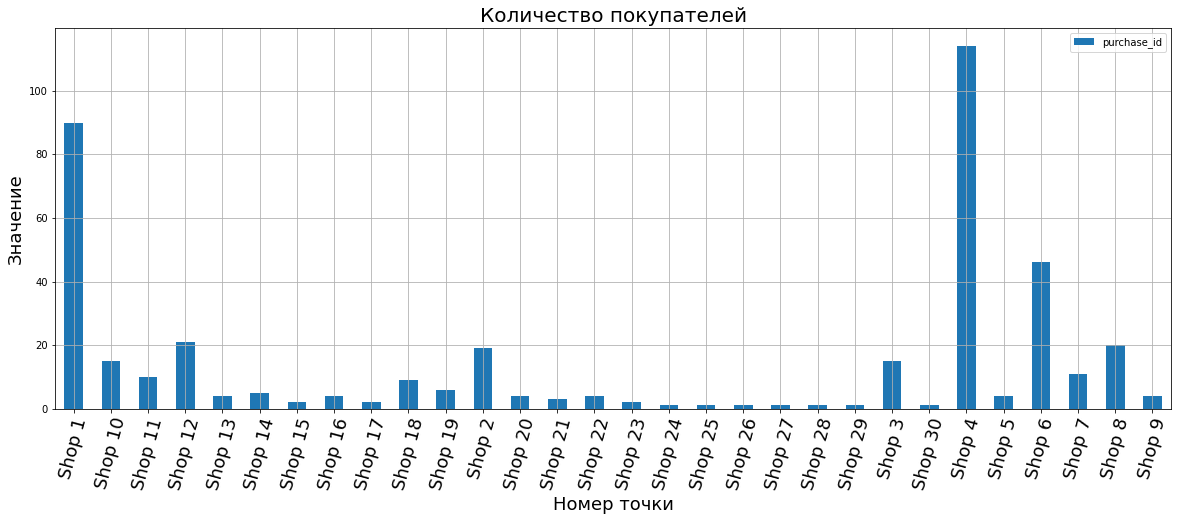

In [44]:
df_grouped[~df_grouped['shop_id'].isin(['Shop 0'])].\
plot(x = 'shop_id', y = ['purchase_id'], figsize =(20,7),kind='bar',grid=True)
plt.title('Количество покупателей',fontsize=20)
plt.xticks(fontsize=18, rotation = 75)
plt.ylabel('Значение',fontsize=18)
plt.xlabel('Номер точки',fontsize=18 )

In [45]:
df_grouped[~df_grouped['shop_id'].isin(['Shop 0'])].sort_values(by = 'purchase_id' , ascending = False).head(10)

,shop_id,sum,quantity,purchase_id,item_id,loyalty_program,price_per_id,avg_check,avg_quantity
25,Shop 4,50533.035,17937,114,703,0.000000,3.115,443.272237,157.342105
1,Shop 1,46119.030,17319,90,588,0.000000,2.950,512.433667,192.433333
27,Shop 6,51947.615,16592,46,644,0.000000,3.325,1129.295978,360.695652
4,Shop 12,6813.930,3357,21,186,0.000000,2.720,324.472857,159.857143
29,Shop 8,14887.030,4651,20,388,0.112701,3.360,744.351500,232.550000
12,Shop 2,36820.295,13681,19,201,0.000000,3.290,1937.910263,720.052632
2,Shop 10,9949.380,3282,15,202,0.000000,3.755,663.292000,218.800000
23,Shop 3,100164.715,41657,15,296,0.000000,2.470,6677.647667,2777.133333
28,Shop 7,11233.930,4500,11,256,0.000000,2.950,1021.266364,409.090909
3,Shop 11,4023.410,1330,10,153,0.000000,3.290,402.341000,133.000000


Действительно, 24, 25,19, 14 имеют эффективные показатели, но низкую проходимость. Проверим так же количество товаров в этих магазинах . Магазины 4, 1, 6 с высокой выручкой и большим количеством покупателей, но как мы помним показатели среднего чека и количества товаров у них невысокие. Рекомендация для 4,1 и 6 : повысить среднее количество товаров в чеке.

In [46]:
import plotly.express as px
fig = go.Figure(data=[go.Pie(labels=df_grouped['shop_id'], values=df_grouped['item_id'])])
fig.show()

In [47]:
df_grouped[~df_grouped['shop_id'].isin(['Shop 0'])].sort_values(by = 'item_id' , ascending = False).head()

,shop_id,sum,quantity,purchase_id,item_id,loyalty_program,price_per_id,avg_check,avg_quantity
25,Shop 4,50533.035,17937,114,703,0.000000,3.115,443.272237,157.342105
27,Shop 6,51947.615,16592,46,644,0.000000,3.325,1129.295978,360.695652
1,Shop 1,46119.030,17319,90,588,0.000000,2.950,512.433667,192.433333
29,Shop 8,14887.030,4651,20,388,0.112701,3.360,744.351500,232.550000
23,Shop 3,100164.715,41657,15,296,0.000000,2.470,6677.647667,2777.133333


Магазины с большим количеством покупателей обладают большим ассортиментом. Рекомендация для магазина 8: повысить количество покупателей (проходимость). Так как ассортимент товаров высокий. Рекомендация для 24, 25,19, 14 увеличить ассортимент. Далее определим какие группы товаров пользуются большим спросом.

In [48]:
df_new_filtered.\
groupby('item_id').\
agg(
    {'price_per_id': 'median',
     'sum' : 'sum',
     'quantity' : 'sum'}
    ).\
    sort_values(by= 'sum', ascending = False).\
    reset_index()

,item_id,price_per_id,sum,quantity
0,22423,12.735,33060.060,2596
1,85123A,3.095,22020.925,7115
2,79321,5.750,16640.500,2894
3,85099B,1.950,14568.450,7471
4,22469,3.290,13959.470,4243
...,...,...,...,...
3151,22202,5.605,-498.845,-89
3152,84613A,2.325,-530.100,-228
3153,21275,16.950,-728.850,-43
3154,D,42.500,-1020.000,-24


In [49]:
df_new_filtered.query('item_id == "22423"')['shop_id'].unique()

array(['Shop 0', 'Shop 6', 'Shop 11', 'Shop 1', 'Shop 4', 'Shop 5',
       'Shop 8', 'Shop 27', 'Shop 18', 'Shop 3', 'Shop 24', 'Shop 12',
       'Shop 10', 'Shop 2', 'Shop 21', 'Shop 15', 'Shop 7'], dtype=object)

В 25,19,14 следует добавить в ассортимент самый популярный товар 22423

In [50]:
df_new_filtered.query('item_id == "85123A"')['shop_id'].unique()

array(['Shop 0', 'Shop 6', 'Shop 18', 'Shop 10', 'Shop 2', 'Shop 8',
       'Shop 26', 'Shop 3', 'Shop 7'], dtype=object)

Аналогично добавить 85123A в 24, 25,19, 14

In [51]:
df_new_filtered.\
groupby('item_id').\
agg(
    {'price_per_id': 'median',
     'sum' : 'sum',
     'quantity' : 'sum'}
    ).\
    sort_values(by= 'quantity', ascending = False).\
    reset_index()

,item_id,price_per_id,sum,quantity
0,85099B,1.950,14568.450,7471
1,85123A,3.095,22020.925,7115
2,21212,1.250,8616.250,6893
3,22197,1.240,7092.800,5720
4,84879,2.405,13270.790,5518
...,...,...,...,...
3151,22588,2.550,-267.750,-105
3152,84612B,0.000,0.000,-163
3153,84613C,2.325,-404.550,-174
3154,84613A,2.325,-530.100,-228


In [52]:
df_new_filtered.query('item_id == "85099B"')['shop_id'].unique()

array(['Shop 0', 'Shop 8', 'Shop 26', 'Shop 1', 'Shop 6', 'Shop 2',
       'Shop 20', 'Shop 10', 'Shop 3', 'Shop 12', 'Shop 4', 'Shop 7'],
      dtype=object)

Вывод: добавить ассортимент популярных товаров и самых продаваемых

## Статистический анализ

Нулевая гипотеза: выручка от покупателей программы лояльности равна выручке остальных покупателей. Альтернативная гипотеза: выручки не равны

Гипотезу проверяем на отфильтрованных данных и убираем магазин shop 0 по той же причине аномальных покупок. 

In [53]:
loyalty_0 = df_new_filtered[~df_new_filtered['shop_id'].isin(['Shop 0'])].query('loyalty_program == 0')['sum']
loyalty_1 = df_new_filtered[~df_new_filtered['shop_id'].isin(['Shop 0'])].query('loyalty_program == 1')['sum']

alpha = 0.05   #уровень статистической значимости 5%

proverka = st.ttest_ind(
    loyalty_0,
    loyalty_1)

print('p-значение', proverka.pvalue)

if (proverka.pvalue < alpha):
    print('Отвергаем нулевую гипотезу. Средние выручки не равны')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение 0.0006997434724082115
Отвергаем нулевую гипотезу. Средние выручки не равны


Программа лояльность не влияет на бизнеc-показатели, а именно выручку торговых точек

#Выводы

Выручка зависит от ассортимента и от среднего чека.





Shop 19 - большое количество товаров в чеке, но средняя цена товара низкая. 
Рекомендация: расширить ассортимент более дорогими позициями.
Рекомендация для 4,1 и 6 : повысить среднее количество товаров в чеке.
Рекомендация для магазина 8: повысить количество покупателей (проходимость). 
Рекомендация для 24, 25,19, 14 увеличить ассортимент товарами 
- 22423
- 85123А
- 79321
- 22469
- 85099В
- 21212
- 22197
- 84879












Программа лояльности не влияет на выручку торговых точек